Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']

First 5 rows of dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0



Training samples: 142, Testing samples: 36
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Hyperparameters Found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Training Accuracy: 1.0
Testing Accuracy: 1.0

Classification Report (Test Set):
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



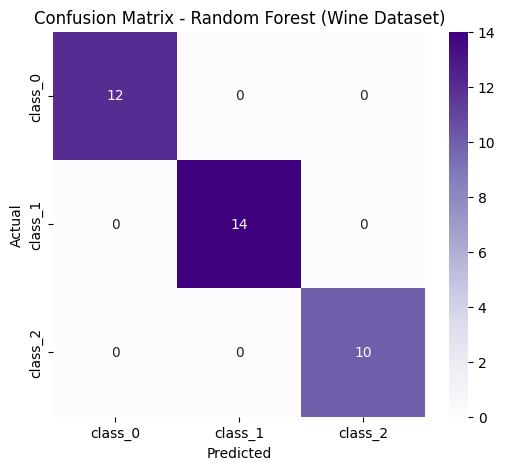

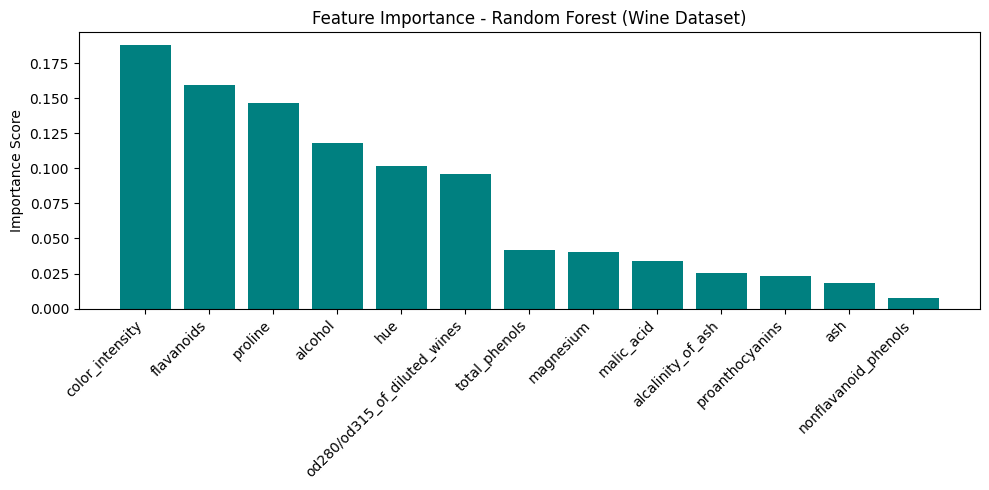


 WHY ENSEMBLE LEARNING (RANDOM FOREST) IS PREFERRED:

• Random Forest is an ensemble of multiple Decision Trees created using Bagging (Bootstrap Aggregation).
• Each tree is trained on a random subset of data and considers random subsets of features.
• This randomness reduces correlation between trees and mitigates overfitting.
• A single Decision Tree tends to overfit the training data, capturing noise and fluctuations.
• Random Forest averages predictions from many trees — improving accuracy, robustness, and stability.
• In the Wine dataset, multiple correlated chemical features (like alcohol, flavanoids, and color intensity)
  make Random Forest ideal since it captures feature interactions better than a single tree.



In [ ]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load the Wine dataset from sklearn
wine = datasets.load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target
target_names = wine.target_names

print("Feature names:", wine.feature_names)
print("Target classes:", target_names)
print("\nFirst 5 rows of dataset:")
display(X.head())

# 3. Preprocessing - handle numerical scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining samples: {len(X_train)}, Testing samples: {len(X_test)}")

# 5. Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 8, 12],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy'
)
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters Found:")
print(grid_search.best_params_)

# 6. Train the best Random Forest model
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# 7. Evaluate model
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("\nTraining Accuracy:", round(train_acc, 3))
print("Testing Accuracy:", round(test_acc, 3))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test, target_names=target_names))

# 8. Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Purples',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix - Random Forest (Wine Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9. Feature Importance Visualization
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), importances[indices], color='teal', align='center')
plt.xticks(range(X.shape[1]), np.array(wine.feature_names)[indices], rotation=45, ha='right')
plt.title("Feature Importance - Random Forest (Wine Dataset)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# 10. Ensemble Learning Explanation
print("\n WHY ENSEMBLE LEARNING (RANDOM FOREST) IS PREFERRED:")
print("""
• Random Forest is an ensemble of multiple Decision Trees created using Bagging (Bootstrap Aggregation).
• Each tree is trained on a random subset of data and considers random subsets of features.
• This randomness reduces correlation between trees and mitigates overfitting.
• A single Decision Tree tends to overfit the training data, capturing noise and fluctuations.
• Random Forest averages predictions from many trees — improving accuracy, robustness, and stability.
• In the Wine dataset, multiple correlated chemical features (like alcohol, flavanoids, and color intensity)
  make Random Forest ideal since it captures feature interactions better than a single tree.
""")
